In [1]:
!pip install matplotlib

In [2]:
!pip install statsmodels

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as sm
import os

In logistic regression, we are modelling a quantity that has two possible outcomes. Without loss of generality, we can label these outcomes a 0 and 1.

Consider a set of credit-card data. A scatter plot of 'In Default' status against balance might look like the one below,

![](./DefaultPlot.png)

If we use a linear regression approach, we only have two unique response variable values (0 and 1), but a lot of scatter on the x-axis. The scatter plot doesn't suggest that there is an obvious linear relationship present.

Instead we model the probability, $P(1 | x)$, of getting the outcome $1$ when the inputs (covariates) are $x$. For simplicity, we use $p$ to denote $P(1 | x)$. In logistic regression the logit of $p$ is modelled as a linear combination of the features $x$. That is we write,

$\log \left ( \frac{p}{1-p} \right ) = {\boldsymbol \beta}^{\top}{\boldsymbol x}$

This is the same saying,

$p\;=\;P(1 | x)\;=\;\frac{\exp({\boldsymbol \beta}^{\top}{\boldsymbol x})}{1 + \exp({\boldsymbol \beta}^{\top}{\boldsymbol x})}$

The function $\exp(x)/(1+\exp(x))$ is known as the sigmoid function and is shown below,

![](./SigmoidFunction.png)

The vector of coefficients, ${\boldsymbol \beta}$, are the parameters of our machine learning model. We determine 'optimal' values of ${\boldsymbol \beta}$ by maximizing the likelihood of the training data. That is, the negative log-likelihood of the training data is our loss function.

In python there are a number of packages that will do the optimization of the loss function for us. For example we can use either scikit-learn, or statsmodels.

Let's look at both packages using a single input feature example with simulated response data so that we can compare our coefficient estimates to the ground truth.

In [4]:
# generate training data
np.random.seed( 2019 )
nTrain = 300 # nuber of points in our training set 

# set the coefficients of the straight line
alpha = -1.0
beta = 0.8

# generate the x values of our training data
mu_covariate = 0.2
sigma_covariate = 1.0
x = np.random.normal(loc=mu_covariate, scale=sigma_covariate, size = nTrain)

# generate the response values
# These are obtained by first computing the positive category probability and 
# then sampling using that probability
logit_p = alpha + (beta * x)
p = np.exp( logit_p ) / ( 1.0 + np.exp( logit_p ) )

clicked = (p > np.random.rand( nTrain ))*1


# reshape covariate for use in sklearn
x = x.reshape(-1,1)

In [5]:
# create scikit-learn logistic regression model
clf = LogisticRegression(random_state=0, solver='lbfgs', penalty='none').fit(x, clicked)

In [6]:
# Look at scikit-learn model coefficients
clf.coef_

array([[0.82415928]])

It looks like we get pretty close to the actual true value of the coefficient. Similarly with the estimate of the intercept.

In [7]:
# Look at scikit-learn model intercept
clf.intercept_

array([-0.87659291])

Let's do the same thing using the statsmodels python package, as we get a lot more diagnostic information out-of-the-box with statsmodels

In [8]:
# create pandas dataframe from training data, for use with statsmodels package
df_clicked = pd.concat( [pd.DataFrame( clicked, columns=['clicked'] ), pd.DataFrame( x, columns=['x'] )], axis=1 )
df_clicked.head()

,clicked,x
0,0,-0.017679
1,0,1.021455
2,1,1.681278
3,1,1.531864
4,0,-0.161865


In [9]:
# create statsmodel logistic regression model
model_sim = sm.logit(formula='clicked ~ x', data=df_clicked) 
result_sim = model_sim.fit()

Optimization terminated successfully.
         Current function value: 0.585123
         Iterations 5


In [10]:
result_sim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                clicked   No. Observations:                  300
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            1
Date:                Tue, 13 Aug 2019   Pseudo R-squ.:                 0.09626
Time:                        14:04:49   Log-Likelihood:                -175.54
converged:                       True   LL-Null:                       -194.23
Covariance Type:            nonrobust   LLR p-value:                 9.651e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8766      0.142     -6.166      0.000      -1.155      -0.598
x              0.8242      0.148      5.568      0.000       0.534       1.114
==============================================================================
"""

Now let's return to our credit-card default data set

## 'Real' dataset

Default data and this notebook are in the github repository below,

https://github.com/dchoyle/LogisticRegressionInPython

In [11]:
#Use Default dataset from ISLR - need to export from R
import pandas as pd
import os

defaultFileInPath = os.path.join( os.getcwd(), 'Default.csv') 
default_raw = pd.read_csv( defaultFileInPath )
default_raw.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [12]:
# look at the summary statistics of the features
default_raw.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [13]:
# let's look at the distribution of default status and student status
default_raw['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [14]:
default_raw['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

Text(0, 0.5, 'Frequency')

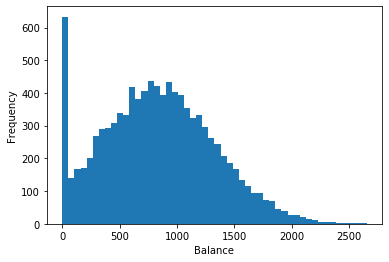

In [15]:
#Look at the histogram of balances and income
n_balance, bins_balance, patches_balance = plt.hist( default_raw['balance'], 50)
plt.xlabel('Balance')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

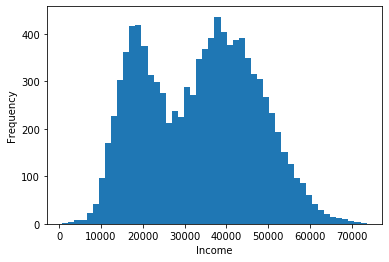

In [16]:
n_income, bins_income, patches_income = plt.hist( default_raw['income'], 50)
plt.xlabel('Income')
plt.ylabel('Frequency')

In [17]:
# create dummy variables
default_raw = pd.get_dummies( default_raw, prefix=['student', 'default'], columns=['student', 'default'], drop_first=True)
default_features = default_raw.drop( ['default_Yes'], axis=1 )
default_outcome = default_raw['default_Yes']

In [18]:
# focus on non-zero balances as by definition zero balances have zero risk of being in default
default_nonZero = default_raw[default_raw.balance > 1.0e-3]
default_nonZero_features = default_nonZero.drop( ['default_Yes'], axis=1 )
default_nonZero_outcome = default_nonZero['default_Yes']

In [19]:
# First split the data in training and test sets before building any classifiers
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(default_nonZero_features, default_nonZero_outcome, test_size=0.2, random_state=42)
default_train = pd.concat( [X_train, y_train], axis=1)

In [20]:
# build scikit-learn logistic regression model
clf_default = LogisticRegression(solver='lbfgs', C=1e12, tol=1.0e-6).fit(X_train.values, y_train.values)

In [21]:
# look at the coefficients of the scikit-learn model
clf_default.coef_

# Do we believe these coefficients?

array([[ 4.23636811e-03, -1.39876889e-04, -4.00922890e+00]])

In [22]:
X_train.columns

Index(['balance', 'income', 'student_Yes'], dtype='object')

Note that if the linear predictor $\eta\;=\;{\boldsymbol \beta}^{\top}{\boldsymbol x}$ increases by $\Delta \eta$ then the odds = $p/(1-p)$ increase by a factor of $e^{\Delta\eta}$

In [23]:
# Build statsmodel logistic regression model
model_All = sm.logit(formula='default_Yes ~ balance + income + student_Yes', data=default_train)
result_All = model_All.fit()

Optimization terminated successfully.
         Current function value: 0.080049
         Iterations 10


In [24]:
result_All.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_Yes   No. Observations:                 7600
Model:                          Logit   Df Residuals:                     7596
Method:                           MLE   Df Model:                            3
Date:                Tue, 13 Aug 2019   Pseudo R-squ.:                  0.4724
Time:                        14:04:50   Log-Likelihood:                -608.37
converged:                       True   LL-Null:                       -1153.0
Covariance Type:            nonrobust   LLR p-value:                7.580e-236
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -11.0255      0.568    -19.424      0.000     -12.138      -9.913
balance         0.0059      0.000     22.128      0.000       0.005       0.006
income      -1.165e-08   9.41e-06     -0.001      0.999   -1.85e-05    1.84e-05
student_Yes    -0.7116      0.265     -2.688      0.007      -1.230      -0.193
===============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [25]:
# Build statsmodel logistic regression model just with balance as a predictor
model = sm.logit(formula='default_Yes ~ balance', data=default_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.081311
         Iterations 10


In [26]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_Yes   No. Observations:                 7600
Model:                          Logit   Df Residuals:                     7598
Method:                           MLE   Df Model:                            1
Date:                Tue, 13 Aug 2019   Pseudo R-squ.:                  0.4640
Time:                        14:04:50   Log-Likelihood:                -617.97
converged:                       True   LL-Null:                       -1153.0
Covariance Type:            nonrobust   LLR p-value:                1.028e-234
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.9272      0.419    -26.103      0.000     -11.748     -10.107
balance        0.0057      0.000     22.326      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Our model gives us predictions of probabilities. We can convert a predicted probability to a decision (binary prediction) by thresholding,

If Probability < Threshold, then Decision = 0, otherwise Decision = 1

However, if we change the thresold our decisions change. Whatever the threshold we will get both False Positives (FP) and False Negatives (FN),

In [27]:
# let's look at ROC curve of classifier to assess its accuracy
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train.values, result.predict(), pos_label=1)

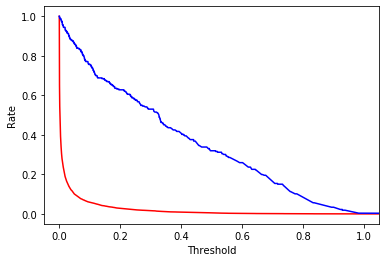

In [28]:
# Plot FPR and TPR against threshold
plt.figure()
plt.plot( thresholds, fpr, color="red")
plt.plot( thresholds, tpr, color="blue")
plt.xlim( [-0.05, 1.05])
plt.ylim( [-0.05, 1.05])
plt.xlabel( "Threshold" )
plt.ylabel( "Rate" )
plt.show()

We will have to make some trade-off between TRP and FPR. How quickly the TPR changes compared to the FPR gives us a measure of the quality of the classifier. The plot of TPR against FPR is called the ROC (Receiver-Operating-Characteristic) curve.

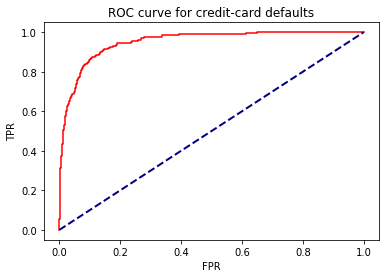

In [29]:
plt.figure()
plt.plot( fpr, tpr, color="red")
plt.xlabel( "FPR" )
plt.ylabel( "TPR" )
plt.title( "ROC curve for credit-card defaults")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

P = Number of positives

N = number of negatives

FNR = 1 - TPR = FN/P . So FNR decreases as FPR increases. 

FPR = FP/N


If the cost of false negative is A and the cost of a false positive is B, then overall cost function is,

$Cost\;=\;A\times FN\;+\;B\times FP\;=\;A\times P\times (1-TPR)\;+\;B\times N\times FPR$

But we have a clear relationship (curve) between TPR and FPR, and so we can write,

$\frac{Cost}{N}\;=\;A\times\frac{P}{N}\times(1-TPR(FPR))\;+\;B\times FPR$

Minimizing the cost with respect to the FPR, gives the optimal FPR rate as the solution to,

$\frac{d\,Cost/N}{d\,FPR}\;=\;0\;=\;-A\times\frac{P}{N}\times\frac{d\,TPR}{d\,FPR}\;+\; B$

which gives the optimal FPR at the point where the tangent on the ROC curve equals,
$\frac{B/A}{P/N}$


In [30]:
# let's calculate positive to negative ratio for this training dataset
default_counts_inTrain = default_train['default_Yes'].value_counts()
positive_to_negative_ratio = default_counts_inTrain.iloc[1]/default_counts_inTrain.iloc[0]
positive_to_negative_ratio

0.03626943005181347

In [31]:
# finally let's evaluate its classification accuracy on the test set with a threshold of 0.8 for
# converting probabilities to decisions
decision_threshold = 0.8
testSetPredictions = (result.predict( X_test ) > decision_threshold )*1

In [32]:
# look at confusion matrix
pd.DataFrame(metrics.confusion_matrix( y_test.values, testSetPredictions))

,0,1
0,1834,0
1,60,7


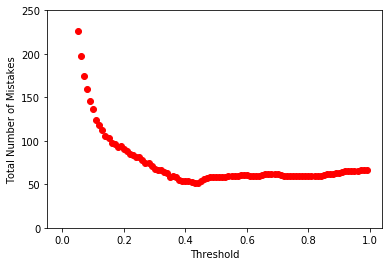

In [33]:
# let's look at how the total number of mistakes on the test set (the sum of the off-diagonal elements of 
# the confustion matrix changes with threshold)

decision_threshold_sequence = np.arange( 0.0, 1.0, 0.01)
mistakeCount = np.zeros( len(decision_threshold_sequence) )
for i in range( len( decision_threshold_sequence ) ):
    testSetPredictions_tmp = (result.predict( X_test ) > decision_threshold_sequence[i] )*1
    confusionMatrix_tmp = metrics.confusion_matrix( y_test.values, testSetPredictions_tmp)
    mistakeCount[i] = confusionMatrix_tmp[0,1] + confusionMatrix_tmp[1,0]
    
plt.figure()
plt.plot( decision_threshold_sequence, mistakeCount, 'ro')
plt.xlabel( "Threshold")
plt.ylabel( "Total Number of Mistakes")
plt.ylim( [0, 250] )
plt.show()